In [ ]:
install.packages('mvtnorm')
library(mvtnorm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 4.95426 2.98682

1.1376384,0.6819066
0.6819066,1.0570338


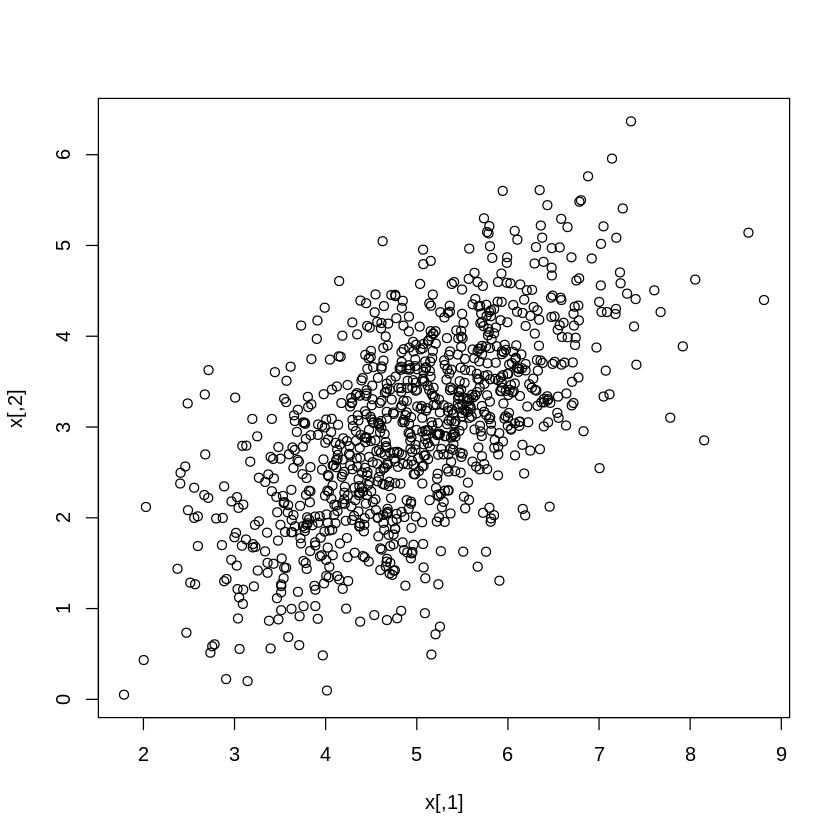

In [ ]:
set.seed(1)
sigma <- matrix(c(1,.6,.6,1), ncol=2, byrow=T)

x <- rmvnorm(n=1000, mean=c(5,3), sigma=sigma, method="chol")
colMeans(x)
var(x)
plot(x)
length <- x[,1]
girth <- x[,2]

In [ ]:
install.packages('ks')
library(ks)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
fhat <- kde(x=x, binned=TRUE)
contourLevels(fhat, cont=c(75, 50, 25))

25%        50%        75% 
0.04918268 0.09168662 0.13125367

In [ ]:
install.packages('ggplot2')
library(ggplot2)
install.packages('MASS')
library(MASS)
install.packages('reshape2')
library(reshape2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



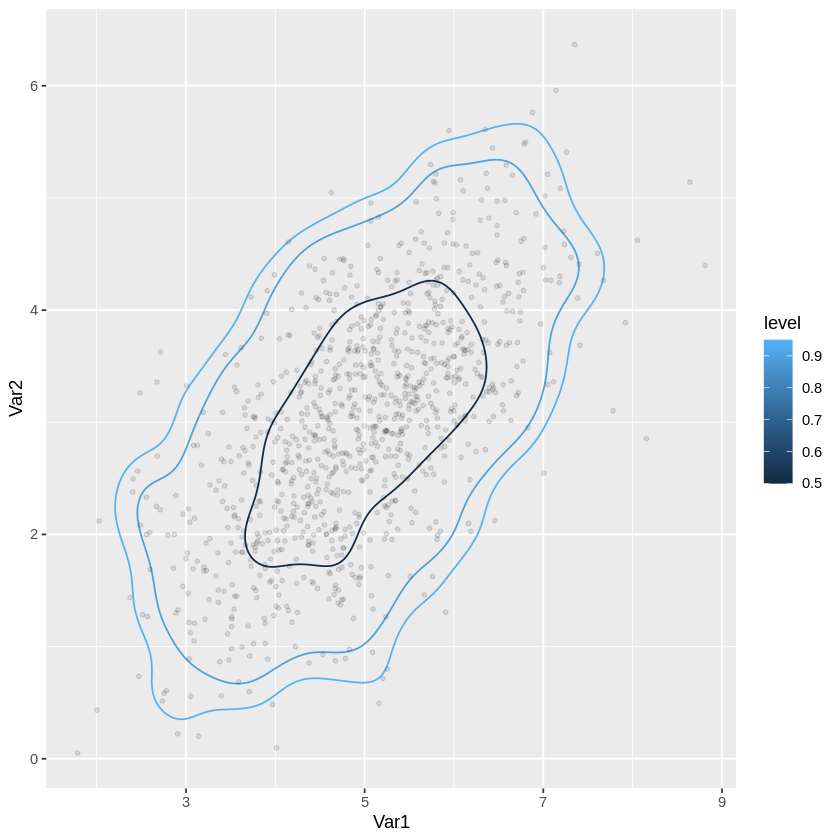

In [ ]:
mv.kde <- kde2d(x[,1], x[,2], n = 400)
dx <- diff(mv.kde$x[1:2])  # lifted from emdbook::HPDregionplot()
dy <- diff(mv.kde$y[1:2])
sz <- sort(mv.kde$z)
c1 <- cumsum(sz) * dx * dy

# specify desired contour levels:
prob <- c(0.95,0.90,0.5)

# plot:
dimnames(mv.kde$z) <- list(mv.kde$x,mv.kde$y)
dc <- melt(mv.kde$z)
dc$prob <- approx(sz,1-c1,dc$value)$y
p <- ggplot(dc,aes(x=Var1,y=Var2))+
  geom_contour(aes(z=prob,color=..level..),breaks=prob)+
  geom_point(aes(x=x[,1],y=x[,2]),data=as.data.frame(x),alpha=0.1,size=1)
print(p)